In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Generate points that are around a line. Adding noise 
final_point = 7500
num_points = 300
middle = 4
last = 15

x = np.random.uniform(0, final_point, num_points)
# y = 3x + 90
y = 3 * x + 90

p = 0.3

# Add random perturbations
# Big perturbations in 30% of the points
# Small perturbations at every point.
y += (np.random.binomial(1, p, size=num_points) * \
     np.random.normal(loc=0.0, scale=10000, size=num_points))\
     + \
     (np.random.normal(loc=0.0, scale=final_point / 5, size=num_points))
        
    

# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show()

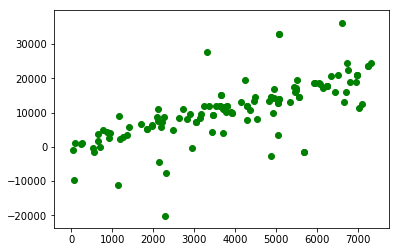

Variance (cubic regression) =  5896095.929190446
Variance (linear regression) =  1256507.0010197319
Bias (cubic regression) =  4223.96882929893
Bias (linear regression) =  3614.2993395834055


In [154]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Curve fitting function
# Fits both cubic and linear curves and returns the prediction for both in a tuple
def fit_curves(sampled_x, sampled_y):  
    lin = linear_model.LinearRegression()
    lin.fit(sampled_x, sampled_y)
    linear_ypred = lin.predict(x[:, np.newaxis])
      
    poly = PolynomialFeatures(degree = 3) 
    sampled_x_poly = poly.fit_transform(sampled_x)
    x_poly = poly.fit_transform(x[:, np.newaxis])
    lin2 = linear_model.LinearRegression() 
    lin2.fit(sampled_x_poly, sampled_y)
    cubic_ypred = lin2.predict(x_poly)
    return((linear_ypred, cubic_ypred))

# Generate 1000 training sets
num_trials = 5
all_cpred = []
all_cbiases = []
all_lpred = []
all_lbiases = []

# Two figures - one each for cubic and linear regression
for j in range(2):
    plt.figure(j)
    plt.scatter(x, y, color = 'blue')


for i in range(num_trials):
    # Create a training data set
    sampled_indices = np.random.choice(num_points, size=25)
    sampled_x = x[sampled_indices]
    sampled_y = y[sampled_indices]
    sampled_x = sampled_x[:, np.newaxis]
    sampled_y = sampled_y[:, np.newaxis]
    (lpred, cpred) = fit_curves(sampled_x, sampled_y)
    
    # Plotting the sampled points - training sample
    for j in range(3):
        plt.figure(j)
        plt.scatter(sampled_x, sampled_y, color = 'green')
    
    # Plot results of cubic curve
    plt.figure(0)
    plt.scatter(x, cpred, color = 'red')
    
    # Plot results of linear curve
    plt.figure(1)
    plt.scatter(x, lpred, color = 'yellow')
    
    cubic_bias = np.abs(y[:, np.newaxis] - cpred)
    linear_bias = np.abs(y[:, np.newaxis] - lpred)
    all_cpred.append(cpred)
    all_cbiases.append(cubic_bias)
    
    all_lpred.append(lpred)
    all_lbiases.append(linear_bias)
    
plt.show()
print("Variance (cubic regression) = ", np.average(np.var(all_cpred, axis=0)))
print("Variance (linear regression) = ", np.average(np.var(all_lpred, axis=0)))
print("Bias (cubic regression) = ", np.average(all_cbiases))
print("Bias (linear regression) = ", np.average(all_lbiases))
#print(all_cbiases)

In [111]:
data = np.arange(6).reshape((3,2))
print(data)
print(np.average(data, axis=0))

[[0 1]
 [2 3]
 [4 5]]
[2. 3.]
